### __Group Project - Predicting Airbnb Listing Prices in Melbourne, Australia__
---

**Instructions:**

- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af](https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af)

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



---
---

### <span style="background-color: yellow;">**Fill out the following information**

- Team Name on Kaggle: `BUSA8001_TheOutliers:))`

---

## Problem Description and Initial Data Analysis


In [ ]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import libarby for geopandas: pip install geopandas contextily shapely --user

c:\Users\Trung\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


****Forecasting Problem****

This project aims to develop a machine learning model to predict the housing price of Airbnb listings in Melbourne based on property features. The goal is to train the model using a labelled dataset and apply it to ptrdict prices for unseen listings with high accuracy.

In real-world use, hosts, as key stakeholders, can rely on the model to set data-driven prices, reducing the risk of underpricing (lost revenue) or overpricing (fewer bookings), particularly helpful for new or inexperienced hosts. Guests, another key stakeholder group, can use predicted prices as a benchmark to assess whether a listing is fairly priced, enabling smarter booking decisions. The model could also enhance Airbnb’s Smart Pricing system by improving price transparency and algorithmic accuracy.

****Evaluation criteria****

This project evaluates model accuracy using **Mean Absolute Error (MAE)**, which measures the average absolute difference between the predicted and actual prices. The formulas as below:

<div align="center">
  <img src="MAE_formula.png" alt="MAE Formula" width="300"/>
</div>

- **Advantages:**
    - Easy to interpret: provides a clear, dollar-based measure of prediction error, making it accessible to non-technical stakeholders.
    - Consistent scaling: treat all errors equally, regardless of the property's price.
    - Reduced sensitivity to outliers: avoid being overly influenced by a small number of unusually high-priced listings.

- **Limitations:**
    - Equal weighting of all errors: weight large error on a premium listing the same as a similar-sized error on a lower-segment property, even though the impact may differ.
    - No relative context: does not reflect the size of the error relative to the actual price.

****Categorise Variables****

| Variable Type | Number of Features | Feature Names |
|:-------------:|:-----------------:|:--------------|
| Numerical     |        37         | host_response_rate<br>host_acceptance_rate<br>host_listings_count<br>latitude<br>longitude<br>accommodates<br>bathrooms<br>bedrooms<br>beds<br>minimum_nights<br>maximum_nights<br>minimum_minimum_nights<br>maximum_minimum_nights<br>minimum_maximum_nights<br>maximum_maximum_nights<br>minimum_nights_avg_ntm<br>maximum_nights_avg_ntm<br>availability_30<br>availability_60<br>availability_90<br>availability_365<br>number_of_reviews<br>number_of_reviews_ltm<br>number_of_reviews_l30d<br>review_scores_rating<br>review_scores_accuracy<br>review_scores_cleanliness<br>review_scores_checkin<br>review_scores_communication<br>review_scores_location<br>review_scores_value<br>calculated_host_listings_count<br>calculated_host_listings_count_entire_homes<br>calculated_host_listings_count_private_rooms<br>calculated_host_listings_count_shared_rooms<br>reviews_per_month |
| Ordinal       |         2         | host_response_time<br>room_type |
| Nominal       |         7         | host_is_superhost<br>host_verifications<br>host_has_profile_pic<br>host_identity_verified<br>property_type<br>has_availability<br>instant_bookable |
| Text          |        10         | source<br>name<br>description<br>neighborhood_overview<br>host_name<br>host_location<br>host_about<br>host_neighbourhood<br>neighbourhood<br>neighbourhood_cleansed<br>amenities |
| Date          |         3         | host_since<br>first_review<br>last_review |


> **Note**: The variables `ID` and `price` are not included in the table above. `ID` is a unique identifier, while `price` is the target variable and is treated separately. Although `price` appears as text in its raw form (eg. $132.00), it will be converted to a numerical type for modeling purposes.

****Missing values****

In [ ]:
# Load train and test sets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Summarise missing values
def missing_summary(df, name):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    percent = (missing / len(df)) * 100
    return pd.DataFrame({
        f'{name}_Missing': missing,
        f'{name}_Missing(%)': percent.round(2)
    })

# Generate missing value summaries
train_missing = missing_summary(train, "Train")
test_missing = missing_summary(test, "Test")

# Combine summaries
missing_df = pd.concat([train_missing, test_missing], axis=1)

# Drop rows with all missing values (feature not missing in either set)
missing_df = missing_df.dropna(how="all")

# Display
missing_df.style.set_caption("Missing Values Summary").format(precision=2)

,Train_Missing,Train_Missing(%),Test_Missing,Test_Missing(%)
host_neighbourhood,3460.00,49.43,2066.00,68.87
host_about,2270.00,32.43,1441.00,48.03
neighbourhood,1823.00,26.04,1424.00,47.47
neighborhood_overview,1823.00,26.04,1424.00,47.47
host_location,1280.00,18.29,770.00,25.67
bedrooms,378.00,5.40,60.00,2.00
room_type,134.00,1.91,41.00,1.37
neighbourhood_cleansed,108.00,1.54,42.00,1.40
property_type,84.00,1.20,39.00,1.30
beds,72.00,1.03,12.00,0.40


The dataset contains several features with missing values in both the training and test sets, though the degree of missingness varies.

- **High missing rate**: The ***location-related field*** shows substantial missingness. `host_neighbourhood` is missing in nearly half of the training set (49.43%) and over two-thirds of the test set (68.87%). Particularly, `neighbourhood` and `neighborhood_overview` show more than 47% in test set.

- **Moderate missing rate**: Variables such as `bedrooms`, and `host_acceptance_rate` exhibit moderate levels of missingness, ranging from 0.9% to around 25%, with `host_location` missing in about 18.29% of the training set and 25.67% of the test set.

- **Low missing rate**: Most numerical and review-based features have low missing (under 1% in train set and 10% in test set), making them manageable for imputation or cleaning.

****Univariate data characteristics in training set****

---

**Exploring target variable (`price`)**
- In this part, I applied a logarithmic transformation to the price variable. The original price values exhibit a highly skewed and diverse range. Applying the log transformation helps normalise the distribution, making it easier to identify underlying trends and outliers in the data.

***Price Distribution***:

,count,mean,std,min,25%,50%,75%,max
price,7000.0,285.65,2325.45,25.0,117.0,172.0,268.0,145160.0


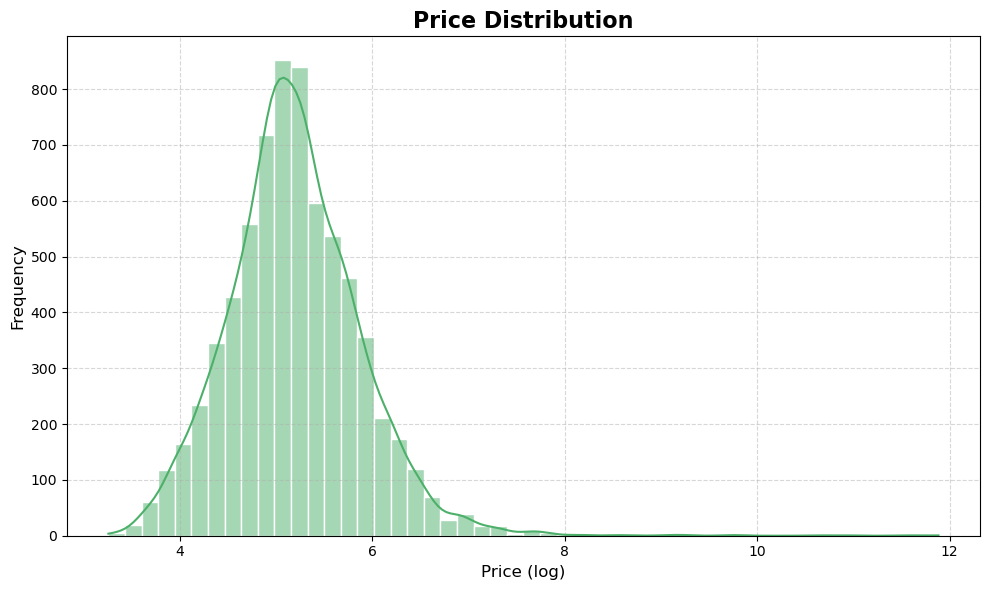

,Price(log),Original Price
0,4,53.60
1,5,147.41
2,6,402.43


In [ ]:
# Transform 'price' to numeric
train['price'] = train['price'].str.replace(r'[\$,]', '', regex=True).astype(float)
# Log-transform price (use log1p to handle extreme values for visualisaion)
train['price_log'] = np.log1p(train['price'])

# Summary table
summary = train['price'].describe()
summary_table = pd.DataFrame(summary).T.round(2)
display(summary_table)

# Price histogram
plt.figure(figsize=(10, 6))
sns.histplot(train['price_log'], bins=50, kde=True, color="#4CB06A", edgecolor='white')
plt.title('Price Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Price (log)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Log-transformed prices
log_prices = [4, 5, 6]
original_prices = np.expm1(log_prices)

# Create a table
price_table = pd.DataFrame({
    'Price(log)': log_prices,
    'Original Price': original_prices.round(2)
})

display(price_table)

- ****Observation:****
    - The price distribution shows that most listings fall within a moderate price range, range from $54 to $402. While a few listings reach extreme values, these are rare. Overall, the distribution highlights a strong concentration of affordable to mid-range listings.
    ---

***Listing Prices Across Melbourne***:

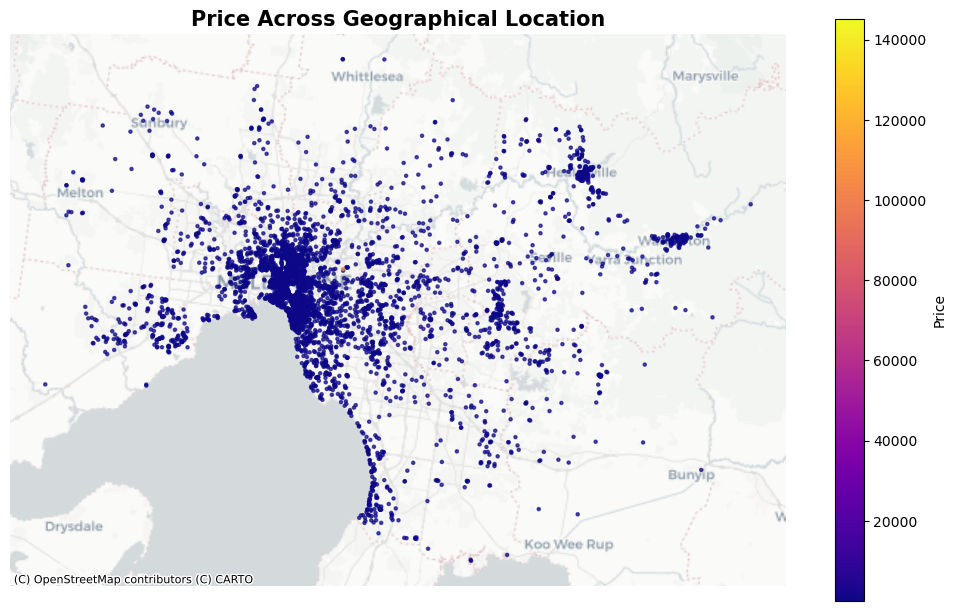

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Convert train to GeoDataFrame
geometry = [Point(xy) for xy in zip(train['longitude'], train['latitude'])]
gdf = gpd.GeoDataFrame(train, geometry=geometry, crs='EPSG:4326')  # WGS 84

# Convert coordinates to Web Mercator
gdf = gdf.to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot prices using color gradient
gdf.plot(
    ax=ax,
    column='price',
    cmap='plasma',
    markersize=5,
    alpha=0.7,
    legend=True,
    legend_kwds={'label': "Price", 'shrink': 0.6}
)

# Add basemap from Carto
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Clean styling
ax.set_title("Price Across Geographical Location", fontsize=15, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

- **Observation**: The map highlights a **high concentration** of listings in Melbourne’s central, southern, and southeastern suburbs. In contrast, western and outer northern suburbs, like Melton and Whittlesea, have significantly fewer listings. Most listings appear in the lower price range, as indicated by the darker points dominating the map, with only a few rare high-priced listings.

    ---
**Explore Features**:

***Property Type and Room Type***:

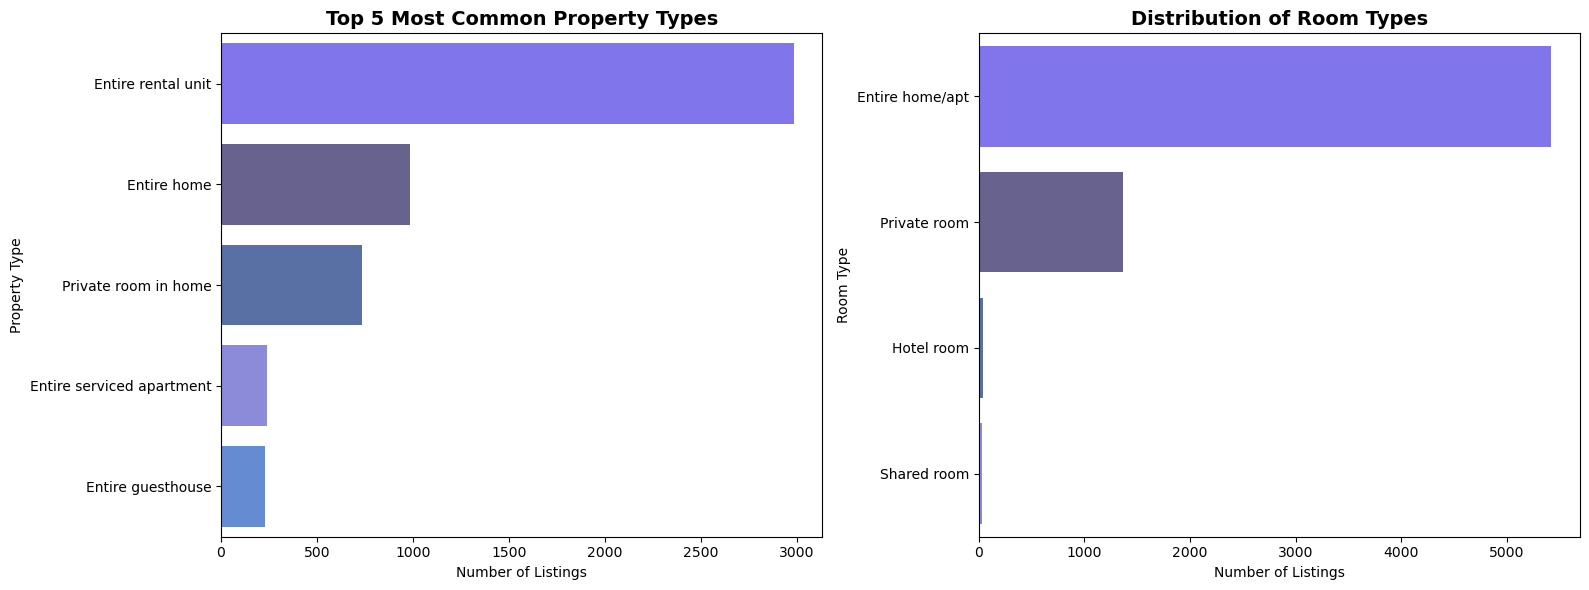

In [ ]:
# Property type and Room type

# Prepare top 5 property types
top_property = train['property_type'].value_counts().head(5).reset_index()
top_property.columns = ['Property Type', 'Count']

# Prepare room type (excluding missing)
room_counts = train['room_type'].dropna().value_counts().reset_index()
room_counts.columns = ['Room Type', 'Count']

# Define custom colors
property_colors = ["#7161FF", "#615B95", "#4B6BB0", "#7F7EE6", "#5385E4"]
room_colors = ["#7161FF", "#615B95", "#4B6BB0", "#7F7EE6"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# --- Left: Property Type ---
sns.barplot(
    x='Count',
    y='Property Type',
    data=top_property,
    hue='Property Type',
    palette=property_colors,
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Top 5 Most Common Property Types", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Number of Listings")
axes[0].set_ylabel("Property Type")
axes[0].grid(False)

# Right side: Room Type
sns.barplot(
    x='Count',
    y='Room Type',
    data=room_counts,
    hue='Room Type',
    palette=room_colors,
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Distribution of Room Types", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Number of Listings")
axes[1].set_ylabel("Room Type")
axes[1].grid(False)

plt.tight_layout()
plt.show()



- **Observation**:
    - The most common property type is **“Entire rental unit”**, with around 3,000 listings, followed by “Entire home” ( around 1,000 listings) and “Private room in home” ( around 800 listings). Other types like “Serviced apartment” and “Guesthouse” show limited presence.
    - Over 5,000 listings are classified as **“Entire home/apt”**, significantly outnumbering “Private rooms”. Listings for “Shared rooms” and “Hotel rooms” are negligible.
    - These figures clearly indicate that hosts tend to offer fully private spaces and home-style stays over shared or hotel-like options.

    ---
***Bedrooms Distribution***:

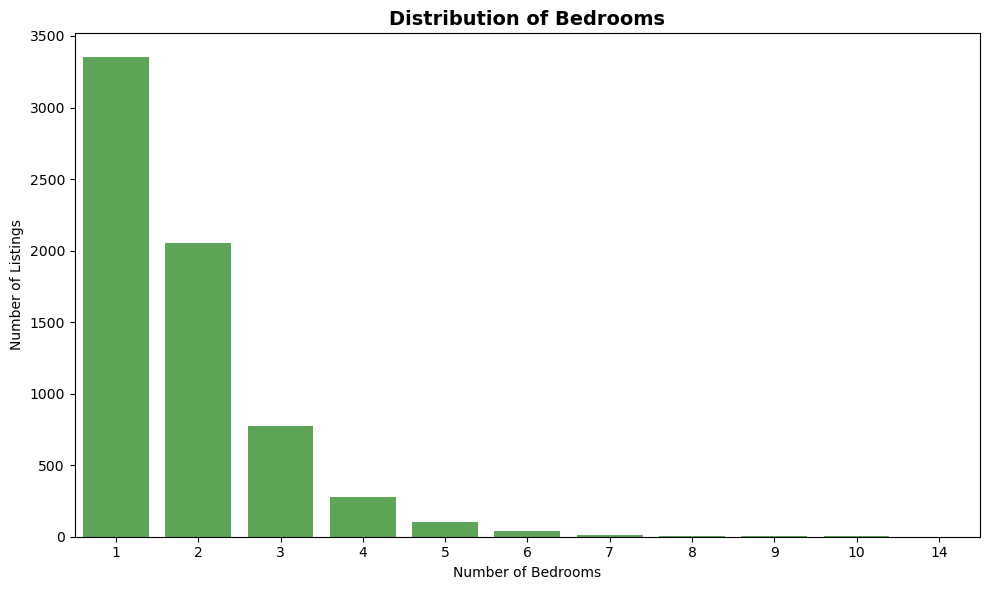

In [ ]:
# Bar chart for bedrooms
bedroom_counts = train['bedrooms'].dropna().astype(int).value_counts().sort_index().reset_index()
bedroom_counts.columns = ['Bedrooms', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Bedrooms', y='Count', data=bedroom_counts, color="#54B04C")

# Styling
plt.title("Distribution of Bedrooms", fontsize=14, fontweight='bold')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Listings")
plt.grid(False)
plt.tight_layout()
plt.show()


- **Observation**: The majority of listings have 1 bedroom (around 3,300 listings), followed by 2-bedroom properties (2,000 listings). Listings with 3 or more bedrooms decline sharply, with only a small number offering more than 5. Properties with more than 6 bedrooms are extremely rare. The suggests that the listings are primarily designed for solo travelers, couples, or small families, rather than large groups.